### Data analysis 

---

1. 문제 정의
2. 데이터 수집 
3. 전처리
4. 가설 설립
5. 데이터 분석
6. 가설 검정
7. 추가 분석

### 1. 문제 정의
- 비대면 시대에 따라 mall 이용자들이 오프라인에서 온라인으로 전환 중
- 오프라인 구매자들에게 주로 하는 마케팅 방식은 캠페인 (문자 발송)
- 성/연령/지역 등의 기초적인 인구통계변수를 버리고 효과적인 문자 발송을 위한 방안 고민 필요

### 2. 데이터 수집
- [Kaggle 데이터]("https://www.kaggle.com/vpfahad/market-basket-analysis-eda") + 일부 변수 가공

In [1]:
"""
분석에 필요한 라이브러리를 가져옵니다.
라이브러리는 파이썬 외부에서 다른 개발자들이 만든 모듈을 의미하고, 필요에 의해 가져올 수 있습니다.
사용자가 직접 만든것도 import 가능 합니다.

데이터 분석에서는 보통 pandas를 거의 기본적으로 가져옵니다.
라이브러리에 대한 자세한 설명은 해당 라이브러리의 공식 홈페이지에서 확인 가능합니다.
"""

import pandas as pd # 데이터 전처리 하는 라이브러리
import matplotlib.pyplot as plt # 그림을 그려주는 라이브러리
import seaborn as sns # 그림을 그려주는 라이브러리

In [2]:
df = pd.read_csv("Mall_Customers.csv")

In [5]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


- speding score에 빵꾸 뚫어 놓기

CustomerID : Blah

Gender : Blah

Age : Blah

Annual Income(k$) : Blah

Spending Score(1-100) : Blah


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
df['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [9]:
for i in df.columns:
    print(df[i].unique())

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200]
['Male' 'Female']
[19 21 20 23 31 22 35 64 30 67 58 24 37 52 25 46 54 29 45 40 60 53 18 49
 42 36 65 48 50 27 33 59 47 51 69 70 63 43 68 32 26 57 38 55 34 66 39 44
 28 56 41]
[ 15  16  17

In [10]:
df.columns = ['CustomerID', 'Gender', 'Age', 'AnnualIncome', 'SpendingScore']

In [11]:
df.head()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Market basket Analysis

In [12]:
df.groupby('Gender')['Age'].mean()

Gender
Female    38.098214
Male      39.806818
Name: Age, dtype: float64

In [13]:
df.groupby('Gender')['AnnualIncome'].mean()

Gender
Female    59.250000
Male      62.227273
Name: AnnualIncome, dtype: float64

In [14]:
df.groupby('Gender')['SpendingScore'].mean()

Gender
Female    51.526786
Male      48.511364
Name: SpendingScore, dtype: float64

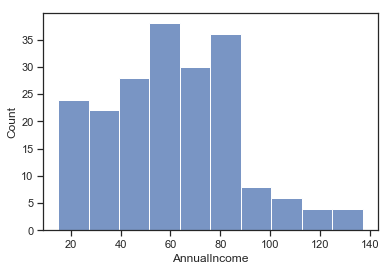

In [18]:
ax = sns.histplot(x="AnnualIncome",  data=df)

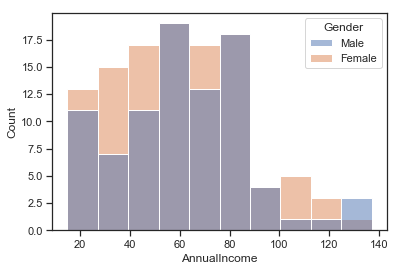

In [16]:
ax = sns.histplot(x="AnnualIncome", hue='Gender', data=df)

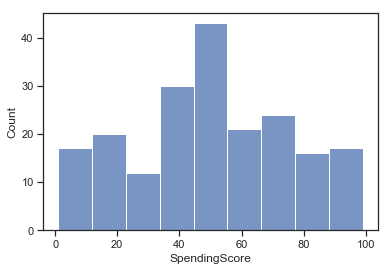

In [19]:
ax = sns.histplot(x="SpendingScore", data=df)

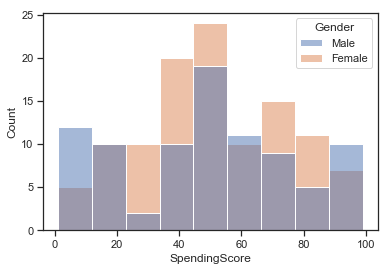

In [17]:
ax = sns.histplot(x="SpendingScore", hue='Gender', data=df)

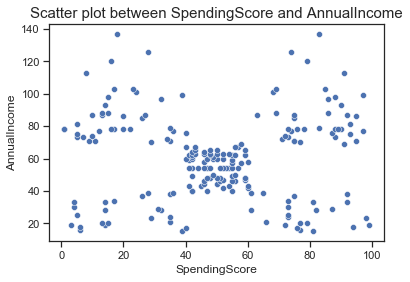

In [25]:
ax = sns.scatterplot(x="SpendingScore", y='AnnualIncome', data=df).set_title("Scatter plot between SpendingScore and AnnualIncome", 
                                                                            fontsize=15)

In [27]:
df.corr()

,CustomerID,Age,AnnualIncome,SpendingScore
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
AnnualIncome,0.977548,-0.012398,1.000000,0.009903
SpendingScore,0.013835,-0.327227,0.009903,1.000000


In [31]:
def get_category_for_age(age):
    cat = 0
    if age <= 19: cat = 1
    elif age <= 29: cat = 2
    elif age <= 39: cat = 3
    elif age <= 49: cat = 4
    elif age <= 59: cat = 5
    else : cat = 6
    return cat

In [32]:
df['age_interval'] = df['Age'].apply(lambda x :get_category_for_age(x))

In [44]:
heatmap_pivot = df.groupby(['age_interval','Gender'])['SpendingScore'].sum().unstack()

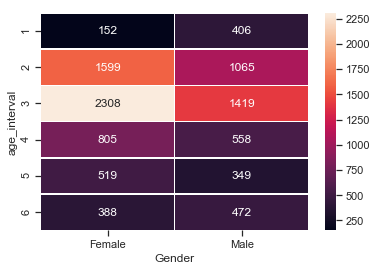

In [51]:
sns.heatmap(heatmap_pivot, annot=True, fmt='d', linewidths=0.5)

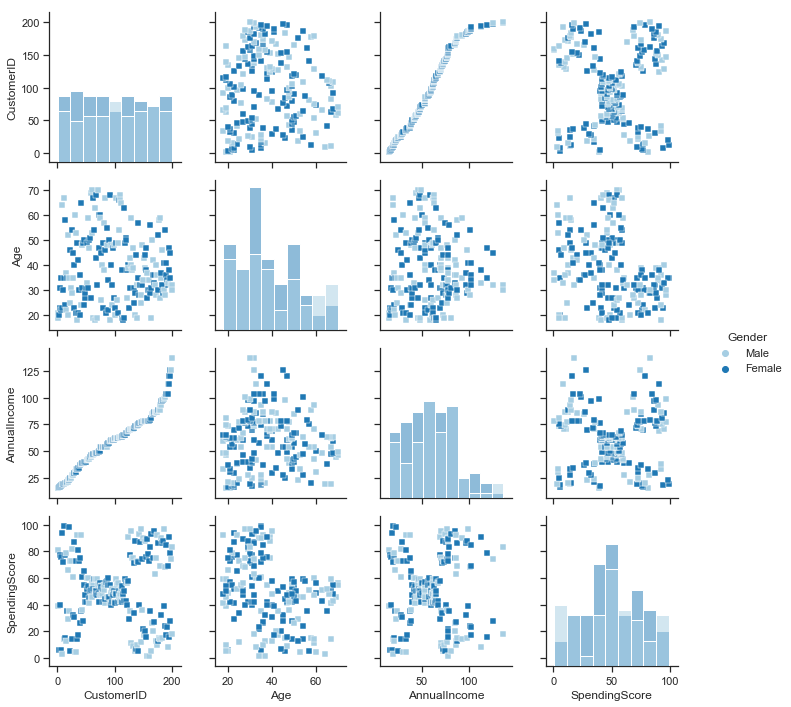

In [15]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(data=df, hue='Gender', palette='Paired', diag_kind='hist', markers='s')
plt.show()

### Hypothesis test

- 가설 검정 정의
- 가설

In [112]:
df[df['Gender']=='Female']

,CustomerID,Gender,Age,AnnualIncome,SpendingScore,label
2,3,Female,20,16,6,0
3,4,Female,23,16,77,4
4,5,Female,31,17,40,0
5,6,Female,22,17,76,4
6,7,Female,35,18,6,0
7,8,Female,23,18,94,4
9,10,Female,30,19,72,4
11,12,Female,35,19,99,4
12,13,Female,58,20,15,0
13,14,Female,24,20,77,4


In [105]:
from scipy import stats

In [115]:
result = stats.ttest_ind(df[df['Gender']=='Female']['AnnualIncome'], df[df['Gender']=='Male']['AnnualIncome'], equal_var=False)

In [116]:
result

Ttest_indResult(statistic=-0.7927442280257677, pvalue=0.42894304774991476)

In [117]:
result = stats.ttest_ind(df[df['Gender']=='Female']['SpendingScore'], df[df['Gender']=='Male']['SpendingScore'], equal_var=False)

In [118]:
result

Ttest_indResult(statistic=0.8048781809684525, pvalue=0.42199772447783646)

In [122]:
# 나이 필터링 하기
df[(df['Age']>=10) & (df['Age'] <= 20)]

,CustomerID,Gender,Age,AnnualIncome,SpendingScore,label
0,1,Male,19,15,39,0
2,3,Female,20,16,6,0
17,18,Male,20,21,66,4
33,34,Male,18,33,92,4
39,40,Female,20,37,75,4
61,62,Male,19,46,55,1
65,66,Male,18,48,59,1
68,69,Male,19,48,59,1
91,92,Male,18,59,41,1
99,100,Male,20,61,49,1


In [54]:
from sklearn.cluster import KMeans

In [71]:
del df["age_interval"]

In [79]:
X_dummies = pd.get_dummies(df['Gender'])

In [82]:
X = pd.concat([df[['Age', 'AnnualIncome', 'SpendingScore']], X_dummies], axis=1)

In [84]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)
label = kmeans.fit_predict(X)

In [86]:
label

array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 2, 1, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2], dtype=int32)

In [87]:
df['label'] = label

In [89]:
df.head()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore,label
0,1,Male,19,15,39,0
1,2,Male,21,15,81,4
2,3,Female,20,16,6,0
3,4,Female,23,16,77,4
4,5,Female,31,17,40,0


### 시각화 결과
- n_cluster = 5
- label 0 : 소비도 없고 소득도 없고
- label 1 : 무조건 적정선
- label 2 : 소비도 많고 소득도 많고
- label 3 : 소득은 적지만 소비는 최대로
- label 4 : 소득은 많지만 쓰는건 적게

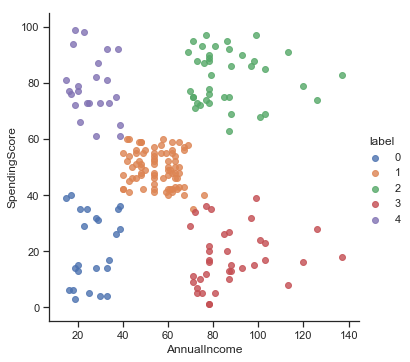

In [92]:
sns.lmplot(data=df, x='AnnualIncome', y='SpendingScore', hue='label', fit_reg=False)

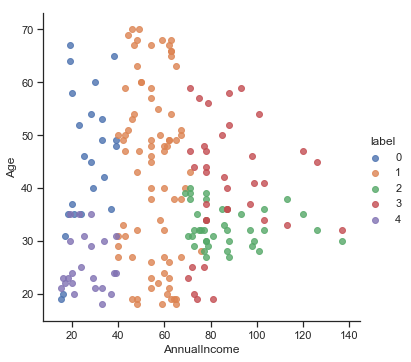

In [93]:
sns.lmplot(data=df, x='AnnualIncome', y='Age', hue='label', fit_reg=False)

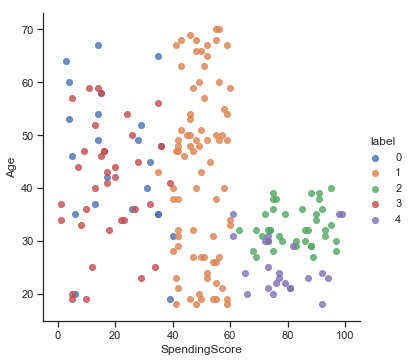

In [96]:
sns.lmplot(data=df, x='SpendingScore', y='Age', hue='label', fit_reg=False)

In [103]:
inertia = []
for n in range(1, 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        random_state=42) )
    algorithm.fit(X)
    inertia.append(algorithm.inertia_)

In [101]:
import numpy as np

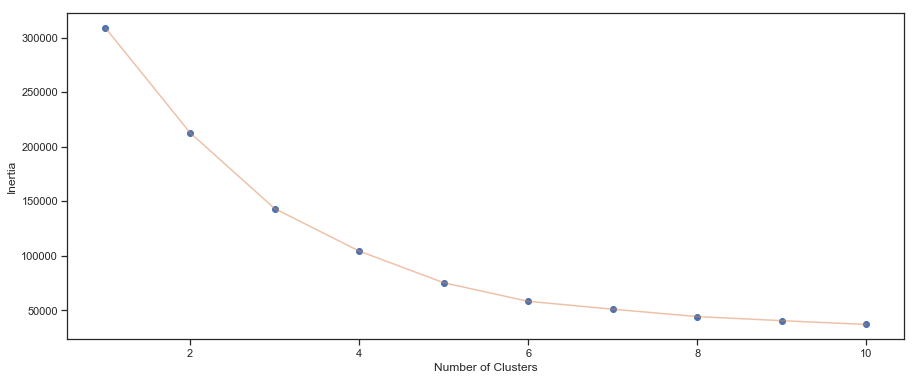

In [104]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()